This is a personal project where we will study the behavior of the banking movements of a credit card, i.e., to know the average of the monthly expenses, type expenses and find the right way tu use the credit card, during a period of time (jul-sept 24).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

***Read the dataset***

The first step is to use the read function to store the dataframe data. 

In [5]:
df = pd.read_csv('movements.csv')

In [7]:
df= df[['DATE', 'CATEGORY', 'AMOUNT','BALANCE']]


In [9]:
df.head()

,DATE,CATEGORY,AMOUNT,BALANCE
0,27/09/2024,PAYMENT,-2574.31,-2041.71
1,22/09/2024,FOOD,26.00,532.60
2,22/09/2024,FOOD,194.00,506.60
3,21/09/2024,FOOD,45.98,312.60
4,21/09/2024,HOME/TOOLS,170.00,266.62


***Data cleaning***

Using the following functions we can observe the types of data that exist in the columns and rows of the dataframe, also, if there are null and non-null values.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      50 non-null     object 
 1   CATEGORY  50 non-null     object 
 2   AMOUNT    50 non-null     float64
 3   BALANCE   50 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


In [13]:
df['DATE'] = pd.to_datetime(df['DATE'])

C:\Users\Karina Pelayo\AppData\Local\Temp\ipykernel_18816\2541906660.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE'] = pd.to_datetime(df['DATE'])


In [36]:
df.head()

,DATE,CATEGORY,AMOUNT,BALANCE
0,2024-09-27,PAYMENT,-2574.31,-2041.71
1,2024-09-22,FOOD,26.00,532.60
2,2024-09-22,FOOD,194.00,506.60
3,2024-09-21,FOOD,45.98,312.60
4,2024-09-21,HOME/TOOLS,170.00,266.62


***Check missing values***

In [17]:
df.isnull().sum()

DATE        0
CATEGORY    0
AMOUNT      0
BALANCE     0
dtype: int64

***Clean missing or unnecesary data***

In [19]:
df = df.dropna()

***Exploratory Data Analysis***

Now, we will continue the analysis of banking movements of the credit card, then analysis of the following points will be carried out: amount of monthly expenses, categories of monthly expenses, behavior of income and expenses over time, behavior of the bank balance over time, analysis of the days with the most expenses and finally, predictions based on the indacted behaviors.

***Monthly expense per month***

In [21]:
df.head()

,DATE,CATEGORY,AMOUNT,BALANCE
0,2024-09-27,PAYMENT,-2574.31,-2041.71
1,2024-09-22,FOOD,26.00,532.60
2,2024-09-22,FOOD,194.00,506.60
3,2024-09-21,FOOD,45.98,312.60
4,2024-09-21,HOME/TOOLS,170.00,266.62


In [23]:
monthly_expense = df[df['AMOUNT']>0].groupby(pd.Grouper(key='DATE', freq='M'))['AMOUNT'].sum()

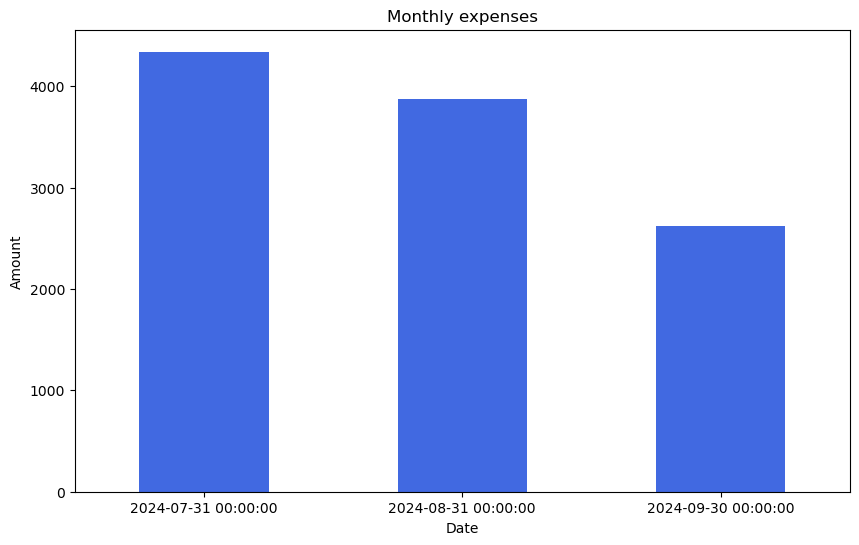

In [25]:
plt.figure(figsize=(10,6))
ax = monthly_expense.plot(kind='bar', color='royalblue')
plt.title('Monthly expenses')
plt.ylabel('Amount')
plt.xlabel('Date')
plt.xticks(rotation=360)
plt.show()

*Please note that amounts are expressed in MXP.

At the end of July, it's possible to observe that in this month I spent more money than other months.

***Spending categories***

We represent these values with this graphic

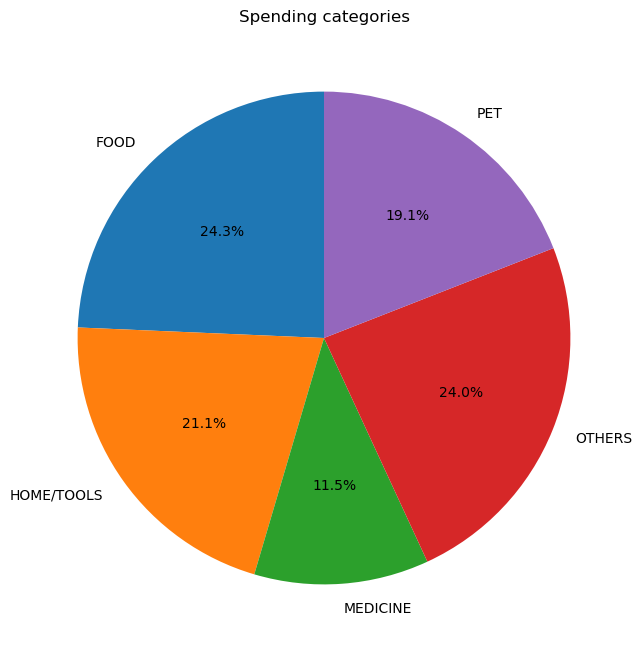

In [77]:
spend_cat = df[df['AMOUNT']>0].groupby('CATEGORY')['AMOUNT'].sum()
spend_cat.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Spending categories')
plt.ylabel('')
plt.show()

The category with the highest percentage is "food" and the other one, "others". The category "food" is about visiting restaurants and "others", are purchases of different items online, books or other entertainment, but that are not essential for the home or other activities that I do.

***Pattern of income and expenses over time***

In this graph we´re going to understand that "income" is the category "payment", i.e., we can understand "income" the payment capacity that I can make in the given period. It´s possible to observe how payments gradually increase over time.

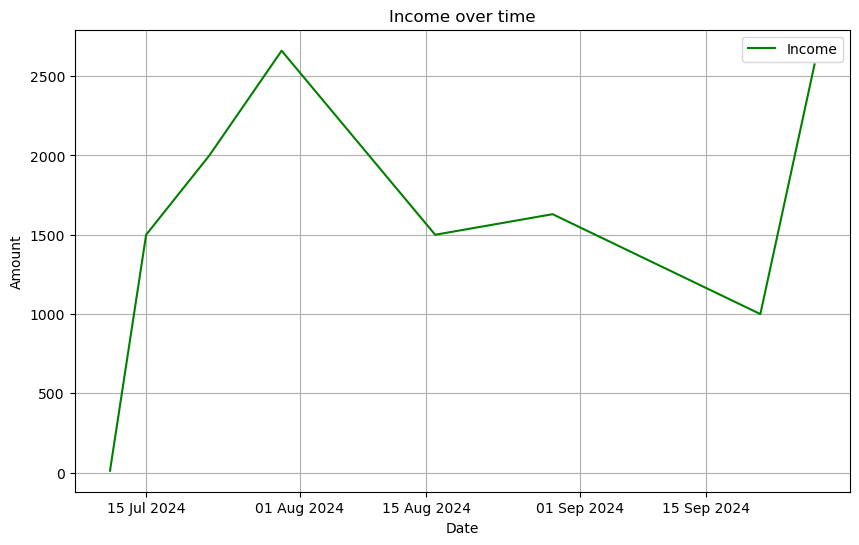

In [103]:
income = (df[df['AMOUNT'] < 0].groupby('DATE')['AMOUNT'].sum())*-1
plt.figure(figsize=(10,6))
plt.plot(income.index, income, label='Income',color='green')
#plt.plot(expenses.index, expenses,label='Expense', color='red')
plt.title('Income over time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))
plt.legend()
plt.grid(True)
plt.show()

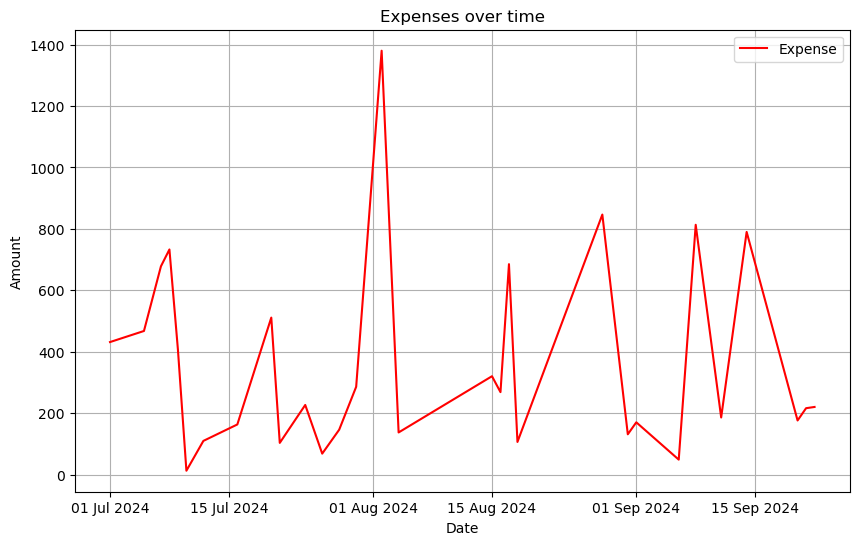

In [80]:
expenses = df[df['AMOUNT']>0].groupby('DATE')['AMOUNT'].sum()
plt.figure(figsize=(10,6))
plt.plot(expenses.index, expenses,label='Expense', color='red')
plt.title('Expenses over time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
august = df[df['AMOUNT']>0]['.groupby('DATE')['AMOUNT'].sum()
plt.figure(figsize=(10,6))
plt.plot(expenses.index, expenses,label='Expense', color='red')
plt.title('Expenses over time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))
plt.legend()
plt.grid(True)
plt.show()

In August 2024 I spent more money than in other periods.

***Balance over time***

With this plot, we can see the balance of my account over time

In [81]:
df.set_index('DATE', inplace=True)

In [82]:
df.head()

,CATEGORY,AMOUNT,BALANCE
DATE,,,
2024-09-27,PAYMENT,-2574.31,-2041.71
2024-09-22,FOOD,26.00,532.60
2024-09-22,FOOD,194.00,506.60
2024-09-21,FOOD,45.98,312.60
2024-09-21,HOME/TOOLS,170.00,266.62


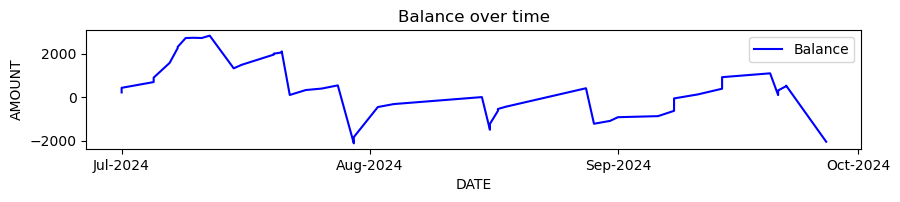

In [83]:
plt.figure(figsize=(10,20))
plt.subplot(11,1,6)
plt.plot(df.index, df['BALANCE'], label='Balance', color='Blue')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Balance over time')
plt.xlabel('DATE')
plt.ylabel('AMOUNT')
plt.legend()
plt.show()

***Behavior by day of the week***

In [92]:
df.reset_index(inplace=True)

In [93]:
df['Day_of_week']=df['DATE'].dt.day_name()

In [94]:
df.head()

,DATE,CATEGORY,AMOUNT,BALANCE,Day_of_week
0,2024-09-27,PAYMENT,-2574.31,-2041.71,Friday
1,2024-09-22,FOOD,26.00,532.60,Sunday
2,2024-09-22,FOOD,194.00,506.60,Sunday
3,2024-09-21,FOOD,45.98,312.60,Saturday
4,2024-09-21,HOME/TOOLS,170.00,266.62,Saturday


*Group by day*

We can group this information with sum or mean; in this case, we´re going to use the function .sum, and we area able to see which days I use with more frecuency my credit card.

In [95]:
weekly_expense= df[df['AMOUNT']>0].groupby('Day_of_week')['AMOUNT'].sum()
print(weekly_expense)

Day_of_week
Friday       2517.65
Monday       1164.17
Saturday     2332.98
Sunday       2373.20
Thursday      320.10
Tuesday       855.70
Wednesday    1271.13
Name: AMOUNT, dtype: float64


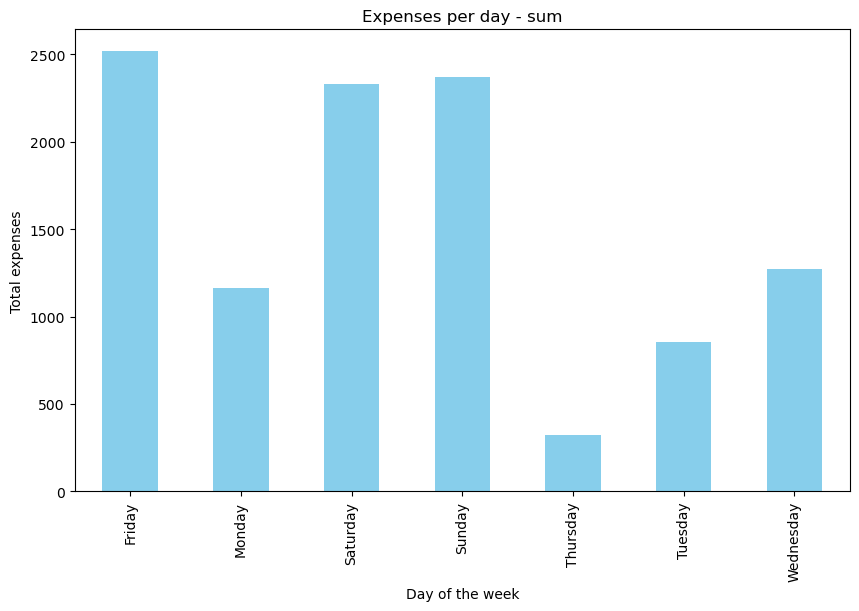

In [96]:
plt.figure(figsize=(10,6))
weekly_expense.plot(kind='bar', color='skyblue')
plt.title('Expenses per day - sum')
plt.ylabel('Total expenses')
plt.xlabel('Day of the week')
plt.show()

In summary, the majority of my expenses occur on weekends (Friday, Saturday and Sunday), on the other hand, during the months of July and August increases are observed in the balances of expenses and payments made to the credit card. Also , the category of expenses that have the highest percentage are "food" and "others", it is important to mention that the "others" category consists of entertainment expenses.
According to the results obtained, I should be more careful with using my card on weekends and put more attention to other types of expenses I make, since they do not cover my basic needs.
